In [91]:
# univariate lstm example
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten


In [92]:
df=pd.read_excel(r"C:\Users\ASUS\Documents\Data.xlsx")

In [93]:
df['Year']=pd.to_datetime(df['Year'])

In [94]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [95]:
# define input sequence
timeseries_data = df['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [96]:
X,y

(array([[ 291667.3016319 ,  296907.5049611 ,  321510.24317414],
        [ 296907.5049611 ,  321510.24317414,  352451.54656777],
        [ 321510.24317414,  352451.54656777,  400846.5856956 ],
        [ 352451.54656777,  400846.5856956 ,  454626.39652421],
        [ 400846.5856956 ,  454626.39652421,  532628.94129803],
        [ 454626.39652421,  532628.94129803,  639569.21997596],
        [ 532628.94129803,  639569.21997596,  749340.24499019],
        [ 639569.21997596,  749340.24499019,  825007.72494696],
        [ 749340.24499019,  825007.72494696,  936379.59336669],
        [ 825007.72494696,  936379.59336669, 1148000.58706407],
        [ 936379.59336669, 1148000.58706407, 1280369.43710241],
        [1148000.58706407, 1280369.43710241, 1459628.62522419],
        [1280369.43710241, 1459628.62522419, 1649646.63569529],
        [1459628.62522419, 1649646.63569529, 1779137.93025266],
        [1649646.63569529, 1779137.93025266, 1966224.58210802],
        [1779137.93025266, 1966224.58210

In [97]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

## Building LSTM Model

In [98]:
X.shape

(21, 3, 1)

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [101]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model= Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.3, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 97.7824 - val_loss: 97.2104 - learning_rate: 0.0010
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 97.0229 - val_loss: 96.4803 - learning_rate: 0.0010
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 96.4041 - val_loss: 95.8934 - learning_rate: 0.0010
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 96.0685 - val_loss: 95.8346 - learning_rate: 0.0010
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 95.6263 - val_loss: 95.7015 - learning_rate: 0.0010
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 95.4188 - val_loss: 95.1938 - learning_rate: 0.0010
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - loss: 95.0064 - val_loss: 94.9315 - learning_rate: 0.0010
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 94.9997 - val_loss: 94.2619 - learning_rate: 0.0010
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 94.4377 - val_loss: 94.1113 - learning_rate: 0.

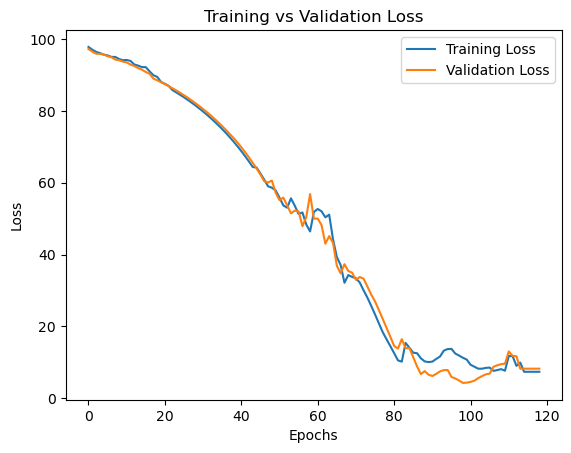

In [102]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [103]:

# Get predictions
y_pred = model.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
MAPE: 7.69%
MAE: 106099.58
RMSE: 147941.15


In [104]:
# demonstrate prediction for next 1year
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<1):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3814223.5]
[3814223.5]


In [20]:
175415.25+3861195.2

4036610.45

In [ ]:
 ₹40,55,847 

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [106]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history2 = model2.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.3, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/1000


C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 96.7152 - val_loss: 96.1838 - learning_rate: 0.0010
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 96.1245 - val_loss: 95.5917 - learning_rate: 0.0010
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 95.5234 - val_loss: 94.9886 - learning_rate: 0.0010
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 94.9111 - val_loss: 94.3738 - learning_rate: 0.0010
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 94.2869 - val_loss: 93.7464 - learning_rate: 0.0010
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 93.6499 - val_loss: 93.1084 - learning_rate: 0.0010
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 93.0021 - val_loss: 92.4527 - learning_rate: 0.0010
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 92.3365 - val_loss: 91.7819 - learning_rate: 0.0010
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 91.6553 - val_loss: 91.0971 - learning_rate: 0.0010
Epoch 10

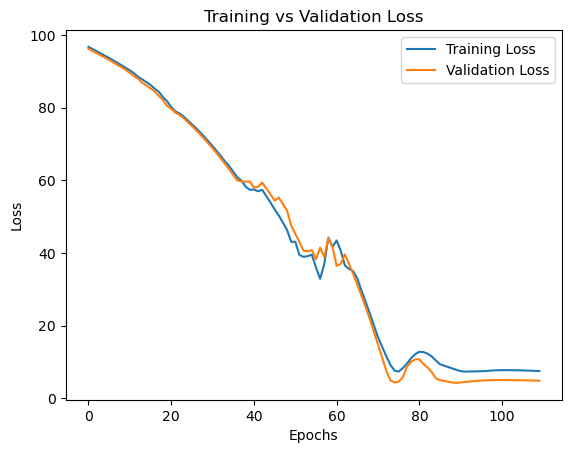

In [107]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [108]:

# Get predictions
y_pred = model2.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
MAPE: 7.50%
MAE: 100877.22
RMSE: 134445.76


In [109]:
# demonstrate prediction for next 1year
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<3):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3735955.5]
1 GDP input [3144138.01684526 3645883.84790797 3735955.5       ]
1 GDP output [[4347589.5]]
2 GDP input [3645883.84790797 3735955.5        4347589.5       ]
2 GDP output [[4862211.5]]
[3735955.5, 4347589.5, 4862211.5]


In [32]:
data=pd.read_excel(r"C:\Users\ASUS\MSc Applied Statistics SPU\Neural Network\LSTM\model1.xlsx")

In [111]:
df=pd.read_excel(r"C:\Users\ASUS\Documents\Data.xlsx")

In [112]:
df.tail()

,Year,GDP
19,2019-03-31,2.528854e+06
20,2020-03-31,2.656806e+06
21,2021-03-31,2.610651e+06
22,2022-03-31,3.144138e+06
23,2023-03-31,3.645884e+06


In [113]:
df['Year']=pd.to_datetime(df['Year'])

In [114]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [115]:
# define input sequence
timeseries_data = df['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [116]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [117]:
X.shape

(21, 3, 1)

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [126]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model3 = Sequential()
model3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history3 = model3.fit(X_train, y_train, epochs=1000, batch_size=8, validation_split=0.3, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/1000


C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 622ms/step - loss: 101.7282 - val_loss: 101.2503 - learning_rate: 0.0010
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 101.2283 - val_loss: 100.7657 - learning_rate: 0.0010
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 100.7183 - val_loss: 100.1301 - learning_rate: 0.0010
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 100.1608 - val_loss: 99.4794 - learning_rate: 0.0010
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 99.5968 - val_loss: 99.4343 - learning_rate: 0.0010
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 99.0708 - val_loss: 98.9851 - learning_rate: 0.0010
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 98.7550 - val_loss: 98.6027 - learning_rate: 0.0010
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 99.2689 - val_loss: 98.1721 - learning_rate: 0.0010
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 98.6502 - val_loss: 98.0373 - learning_rate: 0.0010
Epo

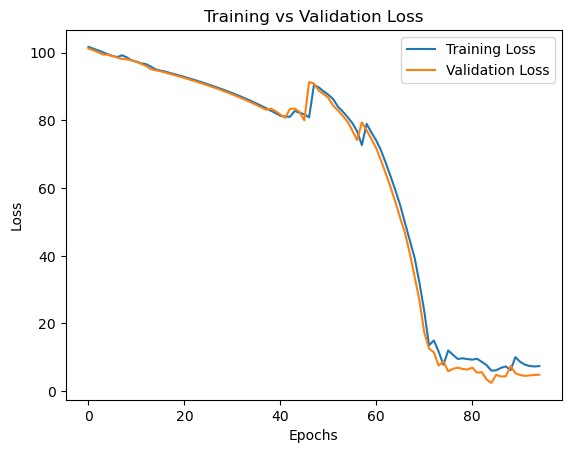

In [127]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [128]:

# Get predictions
y_pred = model3.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
MAPE: 7.57%
MAE: 104224.24
RMSE: 143786.45


In [130]:
# demonstrate prediction for next 1year
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<3):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3805286.2]
1 GDP input [3144138.01684526 3645883.84790797 3805286.25      ]
1 GDP output [[4421527.]]
2 GDP input [3645883.84790797 3805286.25       4421527.        ]
2 GDP output [[4949917.]]
[3805286.2, 4421527.0, 4949917.0]


In [56]:
new_data = pd.DataFrame({"Year": ["2024-03-31"], "GDP": lst_output})
new_data["Year"] = pd.to_datetime(new_data["Year"])  # Ensure correct date format

# Concatenate the new row to the original dataset
df = pd.concat([df, new_data], ignore_index=True)

# Display updated dataset
print(df.tail()) 

         Year           GDP
20 2020-03-31  2.656806e+06
21 2021-03-31  2.610651e+06
22 2022-03-31  3.144138e+06
23 2023-03-31  3.645884e+06
24 2024-03-31  3.900630e+06


In [57]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [58]:
# define input sequence
timeseries_data = df['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [59]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model4 = Sequential()
model4.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history4 = model4.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 102.0523 - val_loss: 101.7652 - learning_rate: 0.0010
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 101.9334 - val_loss: 101.8178 - learning_rate: 0.0010
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 101.8167 - val_loss: 101.6949 - learning_rate: 0.0010
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - loss: 101.6949 - val_loss: 101.5826 - learning_rate: 0.0010
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 101.5834 - val_loss: 101.4727 - learning_rate: 0.0010
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - loss: 101.4743 - val_loss: 101.5020 - learning_rate: 0.0010
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 101.5004 - val_loss: 101.4063 - learning_rate: 0.0010
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step - loss: 101.4048 - val_loss: 101.3129 - learning_rate: 0.0010
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 101.3114 - val_loss: 101.2218 -

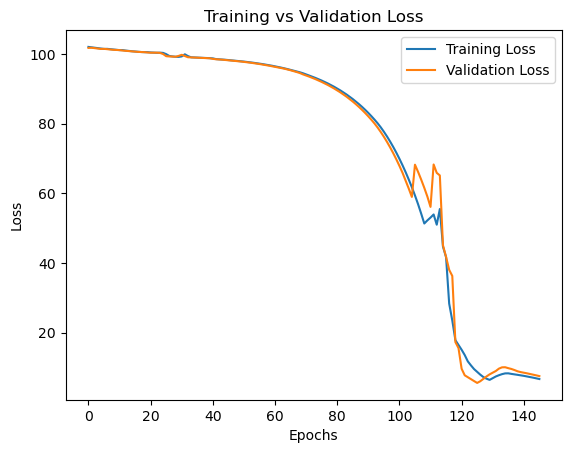

In [62]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [63]:

# Get predictions
y_pred = model4.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
MAPE: 6.84%
MAE: 77520.41
RMSE: 95128.94


In [65]:
# demonstrate prediction for next 1year
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<1):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[4557039.5]
[4557039.5]


In [68]:
new_data = pd.DataFrame({"Year": ["2026-03-31"], "GDP": lst_output})
new_data["Year"] = pd.to_datetime(new_data["Year"])  # Ensure correct date format

# Concatenate the new row to the original dataset
df = pd.concat([df, new_data], ignore_index=True)

# Display updated dataset
print(df.tail()) 

         Year           GDP
22 2022-03-31  3.144138e+06
23 2023-03-31  3.645884e+06
24 2024-03-31  3.900630e+06
25 2026-03-31  4.557040e+06
26 2026-03-31  4.557040e+06


In [70]:
df.tail()

,Year,GDP
21,2021-03-31,2.610651e+06
22,2022-03-31,3.144138e+06
23,2023-03-31,3.645884e+06
24,2024-03-31,3.900630e+06
25,2026-03-31,4.557040e+06


In [64]:
data.tail(3)

,Year,GDP
24,2024-03-31,3957839.5
25,2025-03-31,4407256.0
27,2026-03-31,5053009.0
